# Projet Machine learning

## Data Acquisition

### Data Source

Il s'agit d'un Dataset pour l'entrainemnt à la classificatin de text trouvé sur Kaggle à l'adresse suivante : https://www.kaggle.com/code/matleonard/text-classification#Making-Predictions

Il est composé de deux colonnes. La première est le label des emails (soit ham pour un email normal, soit spam pour un email de type spam. La seconde colonne est composé de text brut représentant les emails.

In [1]:
import pandas as pd
data = pd.read_csv("/content/spam.csv")

## Data Exploration

### Dataset Informations

Cette partie consiste à prendre connaissance de la data. La longueur, la première ligne, le type, le nombre de valeurs uniques etc.

In [2]:
print("What does the data look like : \n{}\n".format(data.head(1)))
print("Data composed of {} lins and {} labels.\n".format(data.shape[0], data.shape[1]))
print("Descrription of the data : \n{}\n".format(data.describe()))
print("Different columns : {}".format(list(data.columns)))
print("Different categories : {}\n".format(data['label'].unique()))
print("Example of an emmail : \n{}".format(data['text'][0]))

What does the data look like : 
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...

Data composed of 5572 lins and 2 labels.

Descrription of the data : 
       label                    text
count   5572                    5572
unique     2                    5158
top      ham  Sorry, I'll call later
freq    4825                      30

Different columns : ['label', 'text']
Different categories : ['ham' 'spam']

Example of an emmail : 
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


### Label Oveview

Le dataset est composé de 4825 emails normaux et 747 mails de type spam soit une rérpartition en 87% / 13%.

Count labels :
ham     4825
spam     747
Name: label, dtype: int64

Count labels in % 
ham     86.593683
spam    13.406317
Name: label, dtype: float64



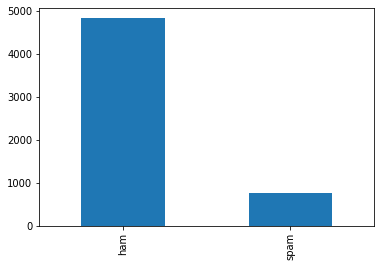

In [3]:
print("Count labels :\n{}\n".format(data['label'].value_counts()))
print("Count labels in % \n{}\n".format(data['label'].value_counts()/(data['label'].value_counts()[0]+data['label'].value_counts()[1])*100))
data['label'].value_counts().plot(kind='bar')

Le jeu de donné ne contient aucune valeur nulle / manquante. Tout la partie sur la gestion de ces dernières ne sera donc pas traitée.

In [4]:
print("Is there any NaN values in labels field or in text field ? :\n")
data.loc[(data['label'].isna() == True) | (data['text'].isna() == True)]

Is there any NaN values in labels field or in text field ? :



,label,text


### Create sets : Train, Test & Validation
### Choose a proportion between the train and the test dataset

A cause du nombre déséquilibré de catégories d'email en faveur des emails normaux, nous avons donc prêté attentionà la structure de la répartition des labels lors du split du jeu en jeu d'entrainement et jeu de test afin de conserver une structure similaire entre les deux.

Le choix a été fait de réaliser une séparaation en 80-20 car nous disposions de suffisament de données.

Shap of the Train dataset : (4457, 2) and shapee of the Test datasset : (1115, 2)


Text(0.5, 0.98, 'Repartition of labels for tain and test sets')

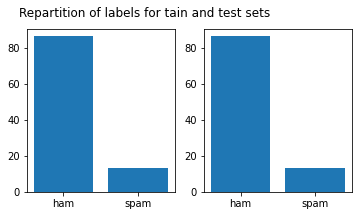

In [5]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.utils.multiclass import unique_labels

Train_dataset, Test_dataset = train_test_split(data, test_size=0.20, random_state=42, stratify=data.label)
print("Shap of the Train dataset : {} and shapee of the Test datasset : {}".format(Train_dataset.shape, Test_dataset.shape))

names = unique_labels(Train_dataset.label)
vp_train = Train_dataset['label'].value_counts()/(Train_dataset['label'].value_counts()[0]+Train_dataset['label'].value_counts()[1])*100
vp_test = Test_dataset['label'].value_counts()/(Test_dataset['label'].value_counts()[0]+Test_dataset['label'].value_counts()[1])*100


plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, vp_train)
plt.subplot(132)
plt.bar(names, vp_test)
plt.suptitle('Repartition of labels for tain and test sets',horizontalalignment='right')

### Analyis
### Univariate analysis

Etant donné la nature de nos données, et le fait que la catégorie à prédire est binaire, nous n'avons que peu d'analyses à faire sur ces dernières mise à part la répartition en nombre et en pourcentage.

ham     86.58 %
spam    13.42 %
Name: labels frequency, dtype: object


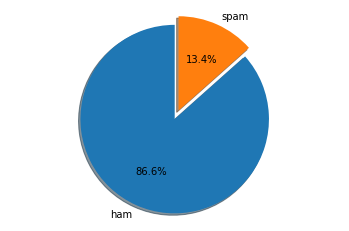

Text(0.5, 0.98, 'Repartition of labels for tain set')

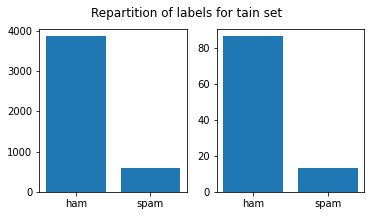

In [6]:
# Frequency tables
freq_table = pd.DataFrame(round(Train_dataset['label'].value_counts()/(Train_dataset['label'].value_counts()[0]+Train_dataset['label'].value_counts()[1])*100,2))
freq_table['labels frequency'] = freq_table['label'].apply(lambda x: str(x) + ' %')
print(freq_table['labels frequency'])

# Pie charts
sizes = list(freq_table['label'])
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

# Bar charts
count = Train_dataset['label'].value_counts()
purcentage = Train_dataset['label'].value_counts()/(Train_dataset['label'].value_counts()[0]+Train_dataset['label'].value_counts()[1])*100

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, count)
plt.subplot(132)
plt.bar(names, purcentage)
plt.suptitle('Repartition of labels for tain set',horizontalalignment='right')

## Data Preprocessing

### Data Transformation

L'une des premières choses que nous avons fait est le nettoyage de nos données. Bien que ces dernières soient textuelles, certains éléments (comme les caractères spéciaux) peuvent vnir polluer notre modèle. Nous avons donc décider de retirer: 
- passonss toutt le texte en minuscule
- La ponctuation
- Les tags
- Les chiffres
- Les caractères spéciaux

In [7]:
DF_train = Train_dataset.copy().reset_index().drop(['index'], axis=1)

In [8]:
import re

clean_txt = []

for w in range(len(DF_train.text)):
    desc = DF_train['text'][w].lower()

    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)

    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

    #remove digits and special chars
    desc = re.sub("(\\d|\\W)+"," ",desc)
    clean_txt.append(desc)

DF_train['text'] = clean_txt
DF_train.head()

,label,text
0,ham,going on nothing great bye
1,ham,i wont so wat s wit the guys
2,ham,ok k sry i knw siva tats y i askd
3,ham,where are you what do you do how can you stand...
4,ham,have you not finished work yet or something


In [65]:
X_train = DF_train.copy()
Y_train = X_train.pop('label')

Lor du traitement de la donnée textuelle par les algorithmes de ML, les input de Data correspondent à des fichiers de texte convertis en vecteurs de caractéristiques numériques. Ici, nous avons segmenter chaque fichier de mots et comptonss le nombre de fois que chaque mmot apparait dans chaque document(fichier / input). Chaque mot se voit ensuite attribué un identifiant (int).

La première pératin renvoie une sortie de type : [n échantillons, n caractéristiques]

Cependant, il existe un problème, le simlple fait de coompterr chaque mot implique que nous attribuons en réalité un poids aux mots et par conséquent, nous donnons une importance plus grande aux documents longs qu'aux plus courts. La ssolution est de compter non pas poour chaque document mais pour l'ensemble des docuements. Exemple: 
- Au lieu d'avoir : Doc 1 "bonjour" 20, Doc 2 "bonjour" 10
- Nous aurons : Doc "bonjour" 30

Aui, certains mots semblent mooins important que d'autres (ex "de", "le" etc.), nous décidons donc de baisser l'importance que nous accordons à ces derniers en réduisant leur poids.

Tout cela est réalisé grâace aau TD-IDF de sklearn.

In [108]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

# Convert to numerical vectors
count_vect = CountVectorizer() 
X_train_counts = count_vect.fit_transform(X_train.text) 
print(X_train_counts.shape)

from sklearn.feature_extraction.text import TfidfTransformer

# Usee global term frequencies and reduce the weightage of more common words
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(4457, 6836)
(4457, 6836)


## Model Training

### Model Seletion | Quick hyperparameters selection | Over/Underfitting

A travers cette section, nous avons décidé de selectionner un 1er groupe de modèles, et pour chacun d'eux réaliser une rapide variation de certains paramètres (afin d'être plus pertinent dans le choix de notre modèle par la suite).

Nous sommes concernés par la famille des modèles d'apprentissages supervisés de type clasification ; nous avons préselectionnés les modèle suivants: 
1. Multinomial Naive Bayes (MNB)
2. Stochastic Gradient Descent Classsifier (SGDC)
3. Logistic Regression (LR)
4. Support Vector Machine (SVC)
5. eXtreme Gradient Boosting (XGBC)

Concernnt les métriques d'évaluations nous avons décidé d'en suivrer plusieurs:
1. le F1-score pour le prédictions binomiales
2. L'accuraacy
3. La précision

In [11]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import make_scorer

# define metrics
scoring = {'f1': make_scorer(f1_score, pos_label='spam'),
           'prec': make_scorer(precision_score, pos_label='spam'),
           'acc': make_scorer(accuracy_score)
           }

In [12]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

parameters_space = {'alpha' : np.arange(0, 1, 0.0001),
                    'fit_prior' : [True, False]
                    }

rscv_MNB = RandomizedSearchCV(MNB, 
                          parameters_space, 
                          n_iter=50, 
                          cv=2, 
                          scoring = scoring, 
                          refit='f1',
                          verbose=0,
                          random_state=42)

rscv_MNB.fit(X_train_tfidf, Y_train)

results_MNB = pd.DataFrame(rscv_MNB.cv_results_)

In [13]:
rscv_MNB.best_score_, rscv_MNB.best_params_

(0.9276378158031948, {'fit_prior': True, 'alpha': 0.1306})

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier()

parameters_space = {'loss' : ['hinge','modified_huber','squared_hinge','perceptron'],
                    'penalty' : ['l2', 'l1', 'elasticnet'],
                    'max_iter': range(1000, 100000, 100),
                    'alpha': np.arange(0, 1, 0.0001)
                    }

rscv_SGD = RandomizedSearchCV(SGD, 
                          parameters_space, 
                          n_iter=50, 
                          cv=2, 
                          scoring = scoring, 
                          refit='f1',
                          verbose=0,
                          random_state=42)

rscv_SGD.fit(X_train_tfidf, Y_train)

results_SGD = pd.DataFrame(rscv_SGD.cv_results_)

In [15]:
rscv_SGD.best_score_, rscv_SGD.best_params_

(0.7957567353113482,
 {'penalty': 'l2', 'max_iter': 20400, 'loss': 'perceptron', 'alpha': 0.112})

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

parameters_space = {'solver' : ['liblinear','sag','saga'],
                    'penalty' : ['l2', 'l1', 'elasticnet'],
                    'max_iter': range(100, 1000, 10),
                    'C': np.arange(0.0001, 1, 0.001)
                    }

rscv_logreg = RandomizedSearchCV(logreg, 
                          parameters_space, 
                          n_iter=100, 
                          cv=5, 
                          scoring = scoring, 
                          refit='f1',
                          verbose=0,
                          random_state=42)

rscv_logreg.fit(X_train_tfidf, Y_train)

results_logreg = pd.DataFrame(rscv_logreg.cv_results_)

In [27]:
rscv_logreg.best_score_, rscv_logreg.best_params_

(0.837192501959396,
 {'solver': 'saga', 'penalty': 'l2', 'max_iter': 930, 'C': 0.9941})

In [ ]:
# Support Vector Machines Model
from sklearn.svm import SVC

SVC = SVC()

parameters_space = {'kernel' : ['linear','poly', 'rbf', 'sigmoid'],
                    'gamma': np.arange(0.0001, 1, 0.001),
                    'C': np.arange(0.0001, 1, 0.001)
                    }

rscv_SVC = RandomizedSearchCV(SVC, 
                          parameters_space, 
                          n_iter=50, 
                          cv=2, 
                          scoring = scoring, 
                          refit='f1',
                          verbose=0,
                          random_state=42)

rscv_SVC.fit(X_train_tfidf, Y_train)

results_SVC = pd.DataFrame(rscv_SVC.cv_results_)

In [23]:
rscv_SVC.best_score_, rscv_SVC.best_params_

(0.9129370943328459, {'kernel': 'linear', 'gamma': 0.3811, 'C': 0.8451})

In [19]:
# XGBoost
from xgboost.sklearn import XGBClassifier

XGB = XGBClassifier()

parameters_space = {'loss' : ['deviance','exponential'],
                    'n_estimators': range(100,500,10)
                    }

rscv_XGB = RandomizedSearchCV(XGB, 
                          parameters_space, 
                          n_iter=50, 
                          cv=2, 
                          scoring = scoring, 
                          refit='f1',
                          verbose=0,
                          random_state=42)

rscv_XGB.fit(X_train_tfidf, Y_train)

results_XGB = pd.DataFrame(rscv_XGB.cv_results_)

In [24]:
rscv_XGB.best_score_, rscv_XGB.best_params_

(0.8997536945812808, {'n_estimators': 310, 'loss': 'exponential'})

### Scoring

Nous avons affiché chaque résultat classé par test d'accuracy décroissant.

In [28]:
results_MNB[['params','mean_test_prec','rank_test_prec','mean_test_acc','rank_test_acc', 'mean_test_f1','rank_test_f1']].sort_values('mean_test_acc', ascending=False).head()

,params,mean_test_prec,rank_test_prec,mean_test_acc,rank_test_acc,mean_test_f1,rank_test_f1
43,"{'fit_prior': True, 'alpha': 0.1306}",0.955574,24,0.981152,1,0.927638,1
32,"{'fit_prior': True, 'alpha': 0.1778}",0.970408,22,0.980928,2,0.925434,3
33,"{'fit_prior': True, 'alpha': 0.1945}",0.972103,21,0.980928,3,0.925286,4
49,"{'fit_prior': True, 'alpha': 0.15760000000000002}",0.963596,23,0.980479,4,0.924105,5
1,"{'fit_prior': True, 'alpha': 0.043000000000000...",0.916714,25,0.980255,5,0.927294,2


In [29]:
results_SGD[['params','mean_test_prec','rank_test_prec','mean_test_acc','rank_test_acc', 'mean_test_f1','rank_test_f1']].sort_values('mean_test_acc', ascending=False).head()

,params,mean_test_prec,rank_test_prec,mean_test_acc,rank_test_acc,mean_test_f1,rank_test_f1
5,"{'penalty': 'l2', 'max_iter': 20400, 'loss': '...",0.937570,2,0.952657,1,0.795757,1
0,"{'penalty': 'l2', 'max_iter': 44900, 'loss': '...",0.915487,3,0.940767,2,0.735740,2
37,"{'penalty': 'l2', 'max_iter': 88200, 'loss': '...",0.964995,1,0.939641,3,0.704634,3
23,"{'penalty': 'l2', 'max_iter': 19300, 'loss': '...",0.500000,4,0.866727,4,0.013201,5
28,"{'penalty': 'l1', 'max_iter': 47400, 'loss': '...",0.000000,6,0.865829,5,0.000000,6


In [30]:
results_logreg[['params','mean_test_prec','rank_test_prec','mean_test_acc','rank_test_acc', 'mean_test_f1','rank_test_f1']].sort_values('mean_test_acc', ascending=False).head()

,params,mean_test_prec,rank_test_prec,mean_test_acc,rank_test_acc,mean_test_f1,rank_test_f1
76,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'...",0.991111,18,0.962306,1,0.837193,1
65,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'...",0.991021,19,0.960510,2,0.827791,4
22,"{'solver': 'liblinear', 'penalty': 'l2', 'max_...",0.991021,19,0.960510,2,0.827791,4
79,"{'solver': 'liblinear', 'penalty': 'l2', 'max_...",0.990928,21,0.959838,4,0.824594,6
93,"{'solver': 'sag', 'penalty': 'l2', 'max_iter':...",0.990928,21,0.959838,4,0.824594,6


In [31]:
results_SVC[['params','mean_test_prec','rank_test_prec','mean_test_acc','rank_test_acc', 'mean_test_f1','rank_test_f1']].sort_values('mean_test_acc', ascending=False).head()

,params,mean_test_prec,rank_test_prec,mean_test_acc,rank_test_acc,mean_test_f1,rank_test_f1
29,"{'kernel': 'linear', 'gamma': 0.3811, 'C': 0.8...",0.982848,31,0.978236,1,0.912937,1
14,"{'kernel': 'linear', 'gamma': 0.4771, 'C': 0.7...",0.984613,29,0.978011,2,0.911803,3
20,"{'kernel': 'linear', 'gamma': 0.6371, 'C': 0.8...",0.982823,32,0.978011,2,0.911933,2
36,"{'kernel': 'linear', 'gamma': 0.8461, 'C': 0.6...",0.986327,27,0.977114,4,0.907683,4
42,"{'kernel': 'sigmoid', 'gamma': 0.8071, 'C': 0....",0.984136,30,0.975543,5,0.900852,5


In [32]:
results_XGB[['params','mean_test_prec','rank_test_prec','mean_test_acc','rank_test_acc', 'mean_test_f1','rank_test_f1']].sort_values('mean_test_acc', ascending=False).head()

,params,mean_test_prec,rank_test_prec,mean_test_acc,rank_test_acc,mean_test_f1,rank_test_f1
17,"{'n_estimators': 310, 'loss': 'exponential'}",0.946626,17,0.974422,1,0.899754,1
5,"{'n_estimators': 380, 'loss': 'deviance'}",0.943019,27,0.973973,2,0.898232,2
14,"{'n_estimators': 380, 'loss': 'exponential'}",0.943019,27,0.973973,2,0.898232,2
45,"{'n_estimators': 350, 'loss': 'exponential'}",0.946207,19,0.973749,4,0.896929,4
37,"{'n_estimators': 350, 'loss': 'deviance'}",0.946207,19,0.973749,4,0.896929,4


## Model Fine-Tuning

Parmis touss less modèles testés, nous avons retenu le modèle Multinomial Naif de Bayes pour les raisons suivantes: 
- Il présente le test moyen d'accurracy le plus élevé comparé aux auters modèles
- Idem pur le F1-score
- Concernant le test de précision il est moins bon que certains mais meilleur que d'autres

In [21]:
# Select the Best Model
Model = MultinomialNB()

Nous avons choisi de réraliser une optimisation du modèle en se basant sur une Random Search Method en ccross-validation sur 5 blocs et 200 itérations.
Le modèle n'ayant pas beaucoup de paramètres nous nous sommes permiss de tous les tester dans des intervalles suffisament grands pour obtenir des résultats (en restant raisonables s'agissant du temps d'exécution).

In [35]:
# List the hypeparameters and optimize with Random Search

parameters_space = {'alpha' : np.arange(0, 5, 0.0001),
                    'fit_prior' : [True, False],
                    'class_prior': [[.2, .8],[.1,.9],[.3,.7],[.4,.6], None]
                    }

rscv_Model = RandomizedSearchCV(Model, 
                          parameters_space, 
                          n_iter=200, 
                          cv=5, 
                          scoring = scoring, 
                          refit='prec',
                          verbose=0,
                          random_state=42)

rscv_Model.fit(X_train_tfidf, Y_train)

results_Model = pd.DataFrame(rscv_Model.cv_results_)

In [36]:
rscv_Model.best_score_, rscv_Model.best_params_

(1.0, {'fit_prior': True, 'class_prior': None, 'alpha': 1.2195})

Avec les meilleurs paramètres testés paar le RSCV nouss allons jusqu'à un score de précision de 93%, unF1-score de 93% et un test d'accuracy de 98%.

In [37]:
results_Model[['params','mean_test_prec','rank_test_prec','mean_test_acc','rank_test_acc', 'mean_test_f1','rank_test_f1']].sort_values('mean_test_acc', ascending=False).head()

,params,mean_test_prec,rank_test_prec,mean_test_acc,rank_test_acc,mean_test_f1,rank_test_f1
119,"{'fit_prior': True, 'class_prior': None, 'alph...",0.939771,23,0.983397,1,0.937992,1
170,"{'fit_prior': True, 'class_prior': None, 'alph...",0.966200,22,0.982724,2,0.933326,2
145,"{'fit_prior': True, 'class_prior': None, 'alph...",0.991149,21,0.969711,3,0.873047,3
72,"{'fit_prior': True, 'class_prior': None, 'alph...",0.993251,20,0.967691,4,0.863317,9
104,"{'fit_prior': False, 'class_prior': None, 'alp...",0.826981,47,0.963205,5,0.870051,4


Nous réentrainons donc le modèle avec ces paramètres ssur le jeu d'entrainement et obtenons lee score final de 96% sur le jeu d'entrainement.

In [103]:
# Rtrain the model
FinalModel = MultinomialNB(fit_prior=True, class_prior=None, alpha=1.2195)

FinalModel.fit(X_train_tfidf, Y_train)

print("Accuracy Score of the retained Multinomial Naiv Bayes Model : {:.2f}%".format(FinalModel.score(X_train_tfidf, Y_train)*100))

Accuracy Score of the retained Multinomial Naiv Bayes Model : 96.52%


## Model Testing

Nous paassons donc au test de notre modèle sur le jeu de test. Pour cela nous lui réappliquons les transformations faites au modèle d'entrainement.

In [91]:
# Take the splitted Dataset and reset index
DF_test = Test_dataset.copy().reset_index().drop(['index'], axis=1)

# Apply same transformations as the Train Dataset
clean_txt = []

for w in range(len(DF_test.text)):
    desc = DF_test['text'][w].lower()

    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)

    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

    #remove digits and special chars
    desc = re.sub("(\\d|\\W)+"," ",desc)
    clean_txt.append(desc)

DF_test['text'] = clean_txt

print("Remove secial chars from text data of the Test Dataset :\n{}\n".format((DF_test.head())))

X_test = np.array(DF_test.copy())
Y_test = X_test.pop('label')

print("Lengh of Test Datast : {}\n".format(len(X_test)))

Remove secial chars from text data of the Test Dataset :
  label                                               text
0   ham  oh right ok i ll make sure that i do loads of ...
1   ham                       i am in tirupur call you da 
2   ham             no that just means you have a fat head
3  spam        you have won cash or a prize to claim call 
4   ham  come aftr lt decimal gt now i m cleaning the h...

Lengh of Test Datast : 1115



In [111]:
# Transform Test Data
X_test_f = count_vect.transform(X_test)
X_test_f = tfidf_transformer.transform(X_test_f)

# Predict Test Data
predicted = FinalModel.predict(X_test_f)

Enfin, nous prédisons sur le jeu de test, eet évaluons less résultats.
Le modèle a correctementt classifié 100% des emails normaux et 95% des emails de type spam (score de précision). Avec une accuracy générale de 97%.
Le faait qu'il classifie mieux les emails normaux de nous éetonnent que peu étant donné la répartition de base (87% normaux et 13% spam)

In [112]:
from sklearn.metrics import classification_report

print('accuracy %s' % accuracy_score(predicted, Y_test))
print(classification_report(Y_test, predicted,target_names=['spam','ham']))

accuracy 0.9533632286995516
              precision    recall  f1-score   support

        spam       0.95      1.00      0.97       966
         ham       1.00      0.65      0.79       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



## Test it for fun !

In [121]:
emails = ["Dear Valentin, I know you're busy, but could you check for the final request I send you. Thank you in advance. Thibault"]

tst = count_vect.transform(np.array(emails))
tst = tfidf_transformer.transform(tst)

prediction = FinalModel.predict(tst)

print(prediction)

['ham']
